In [1]:
%cd ..

/pub/hofmann-scratch/glanzillo/ded


In [2]:

import importlib
import json
import math
import os
import socket
import sys
import time


internal_path = os.path.abspath(os.path.join('.'))
sys.path.append(internal_path)
sys.path.append(internal_path + '/datasets')
sys.path.append(internal_path + '/utils')

import datetime
import uuid
from argparse import ArgumentParser

import setproctitle
import torch
import numpy as np
import pandas as pd 
import json


import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import AutoMinorLocator
from matplotlib.collections import LineCollection



In [3]:
%ls

__init__.py  dataset_utils/     log.txt  logs.txt          scripts/  wandb/
data/        languini-kitchen/  logs/    requirements.txt  utils/


In [4]:
logs_path = './logs/results/cifar100/resnet18/logs_v2.txt'
results = []
with open(logs_path) as f:
    while line := f.readline():
        results.append(json.loads(line))

In [5]:
res_df_c100 = pd.DataFrame(results)
res_df_c100.head(5)

,distributed,lr,checkpoints,checkpoints_stud,pretrained,optim_wd,optim_adam,optim_mom,optim_warmup,optim_nesterov,...,final_train_acc_S,final_cka_train,final_cka_val,network,final_val_acc_S,final_train_agreement,final_val_agreement,final_val_function_distance,final_distance_teacher_student,label_smoothing
0,no,0.1,True,True,False,0.0001,False,0,5,False,...,100.000000,0.554770,0.284797,resnet18,16.06,100.000000,16.43,0.770637,79.872841,NaN
1,no,0.1,True,True,False,0.0001,False,0,5,False,...,100.000000,0.743277,0.321956,resnet18,19.41,100.000000,19.72,0.739756,71.760742,NaN
2,no,0.1,True,True,False,0.0001,False,0,5,False,...,99.916667,0.269697,0.226916,resnet18,12.62,99.916667,12.65,0.817719,60.333302,NaN
3,no,0.1,True,True,False,0.0001,False,0,5,False,...,100.000000,0.324090,0.242481,resnet18,13.51,100.000000,13.68,0.828227,69.924026,NaN
4,no,0.1,True,True,False,0.0001,False,0,5,False,...,100.000000,0.879016,0.400675,resnet18,25.12,100.000000,25.83,0.684991,63.894932,NaN


In [67]:
logs_path = './logs/results/cifar5m/resnet18_v2/logs.txt'
results = []
with open(logs_path) as f:
    while line := f.readline():
        results.append(json.loads(line))

In [68]:
res_df_c10 = pd.DataFrame(results)
res_df_c10.head(5)

,distributed,lr,checkpoints,checkpoints_stud,pretrained,optim_wd,optim_adam,optim_mom,optim_warmup,optim_nesterov,...,final_cka_val,final_fa_train,final_fa_val,buffer_train_time,final_train_acc_S,final_val_acc_S,final_train_agreement,final_val_agreement,final_val_function_distance,final_distance_teacher_student
0,no,0.1,True,False,False,0.001,False,0,5,False,...,0.519839,0.539543,0.573407,227.365583,87.416667,54.16,97.583333,54.70,0.462443,58.667561
1,no,0.1,True,False,False,0.001,False,0,5,False,...,0.199171,0.687912,0.691039,229.260252,88.000000,33.49,100.000000,33.51,0.764355,57.871304
2,no,0.1,True,False,False,0.001,False,0,5,False,...,0.528224,0.505533,0.554026,229.901014,87.583333,53.55,96.833333,54.10,0.466794,58.757626
3,no,0.1,True,False,False,0.001,False,0,5,False,...,0.544312,0.509326,0.560787,232.059020,87.416667,53.85,97.250000,54.73,0.457923,58.554317
4,no,0.1,True,False,False,0.001,False,0,5,False,...,0.484653,0.567399,0.606401,247.916462,100.000000,51.05,88.000000,51.23,0.510306,58.102058


In [10]:
res_df_c10['teacher_network'].unique()

array(['resnet18', 'CNN'], dtype=object)

In [11]:
logs_path = './logs/results/imagenet/resnet50/logs.txt'
results = []
with open(logs_path) as f:
    while line := f.readline():
        results.append(json.loads(line))
res_df_imagenet = pd.DataFrame(results)
res_df_imagenet.head(5)

,distributed,lr,checkpoints,pretrained,optim_wd,optim_mom,optim_nesterov,n_epochs,batch_size,validate_subset,...,temperature,conf_jobnum,conf_timestamp,conf_host,wandb_url,final_cka_train,final_cka_val,final_fa_train,final_fa_val,runs_id
0,no,0.1,True,False,0.0001,0.9,0,90,64,1000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,no,0.1,True,False,0.0001,0.9,0,90,64,1000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,no,0.1,True,False,0.0001,0.9,0,90,64,1000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,no,0.1,True,False,0.0001,0.9,0,90,64,1000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,no,0.1,True,False,0.0001,0.9,0,90,64,1000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
res_df_imagenet.loc[res_df_imagenet['final_cka_train']>0].loc[res_df_imagenet['buffer_size_p']==0.001]['final_train_acc_S']

321     8.833333
322    16.666667
323     5.166667
324     3.583333
325    19.750000
326     1.166667
327    13.166667
328     1.083333
329     7.333333
330     2.166667
331    13.833333
332    13.916667
333    12.333333
334     7.833333
335     0.666667
336    10.916667
337    10.000000
338     4.000000
339    12.833333
340     9.333333
341     0.416667
342     7.666667
343     6.083333
344     3.916667
345    11.000000
346    18.750000
347     9.000000
348    21.000000
349     0.916667
350    11.833333
351    16.583333
352     5.000000
353     8.333333
354    12.750000
355    11.916667
Name: final_train_acc_S, dtype: float64

In [102]:
def process_dataframe(df, N=50000):
    df['buffer_size_p'] = df['buffer_size']/N
    df['generalization_gap'] = (df['final_val_acc_S']-df['final_train_acc_S']).abs()
    df['T']= df['temperature'].astype('category')
    df['data_size']= df['buffer_size'].astype('category')
    return df

In [14]:
buffer_sizes = sorted(list(res_df['buffer_size'].unique()))
buffer_sizes_p = sorted(working_df['buffer_size_p'].unique())
temperatures = sorted(working_df['temperature'].unique())
teacher_val_accuracy = list(working_df['final_val_acc_D'])[0]
buffer_sizes_p

[0.02, 0.1, 0.2, 0.4, 0.8]

/tmp/ipykernel_1766551/888074064.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['buffer_size_p'] = df['buffer_size']/N
/tmp/ipykernel_1766551/888074064.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['generalization_gap'] = (df['final_val_acc_S']-df['final_train_acc_S']).abs()
/tmp/ipykernel_1766551/888074064.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

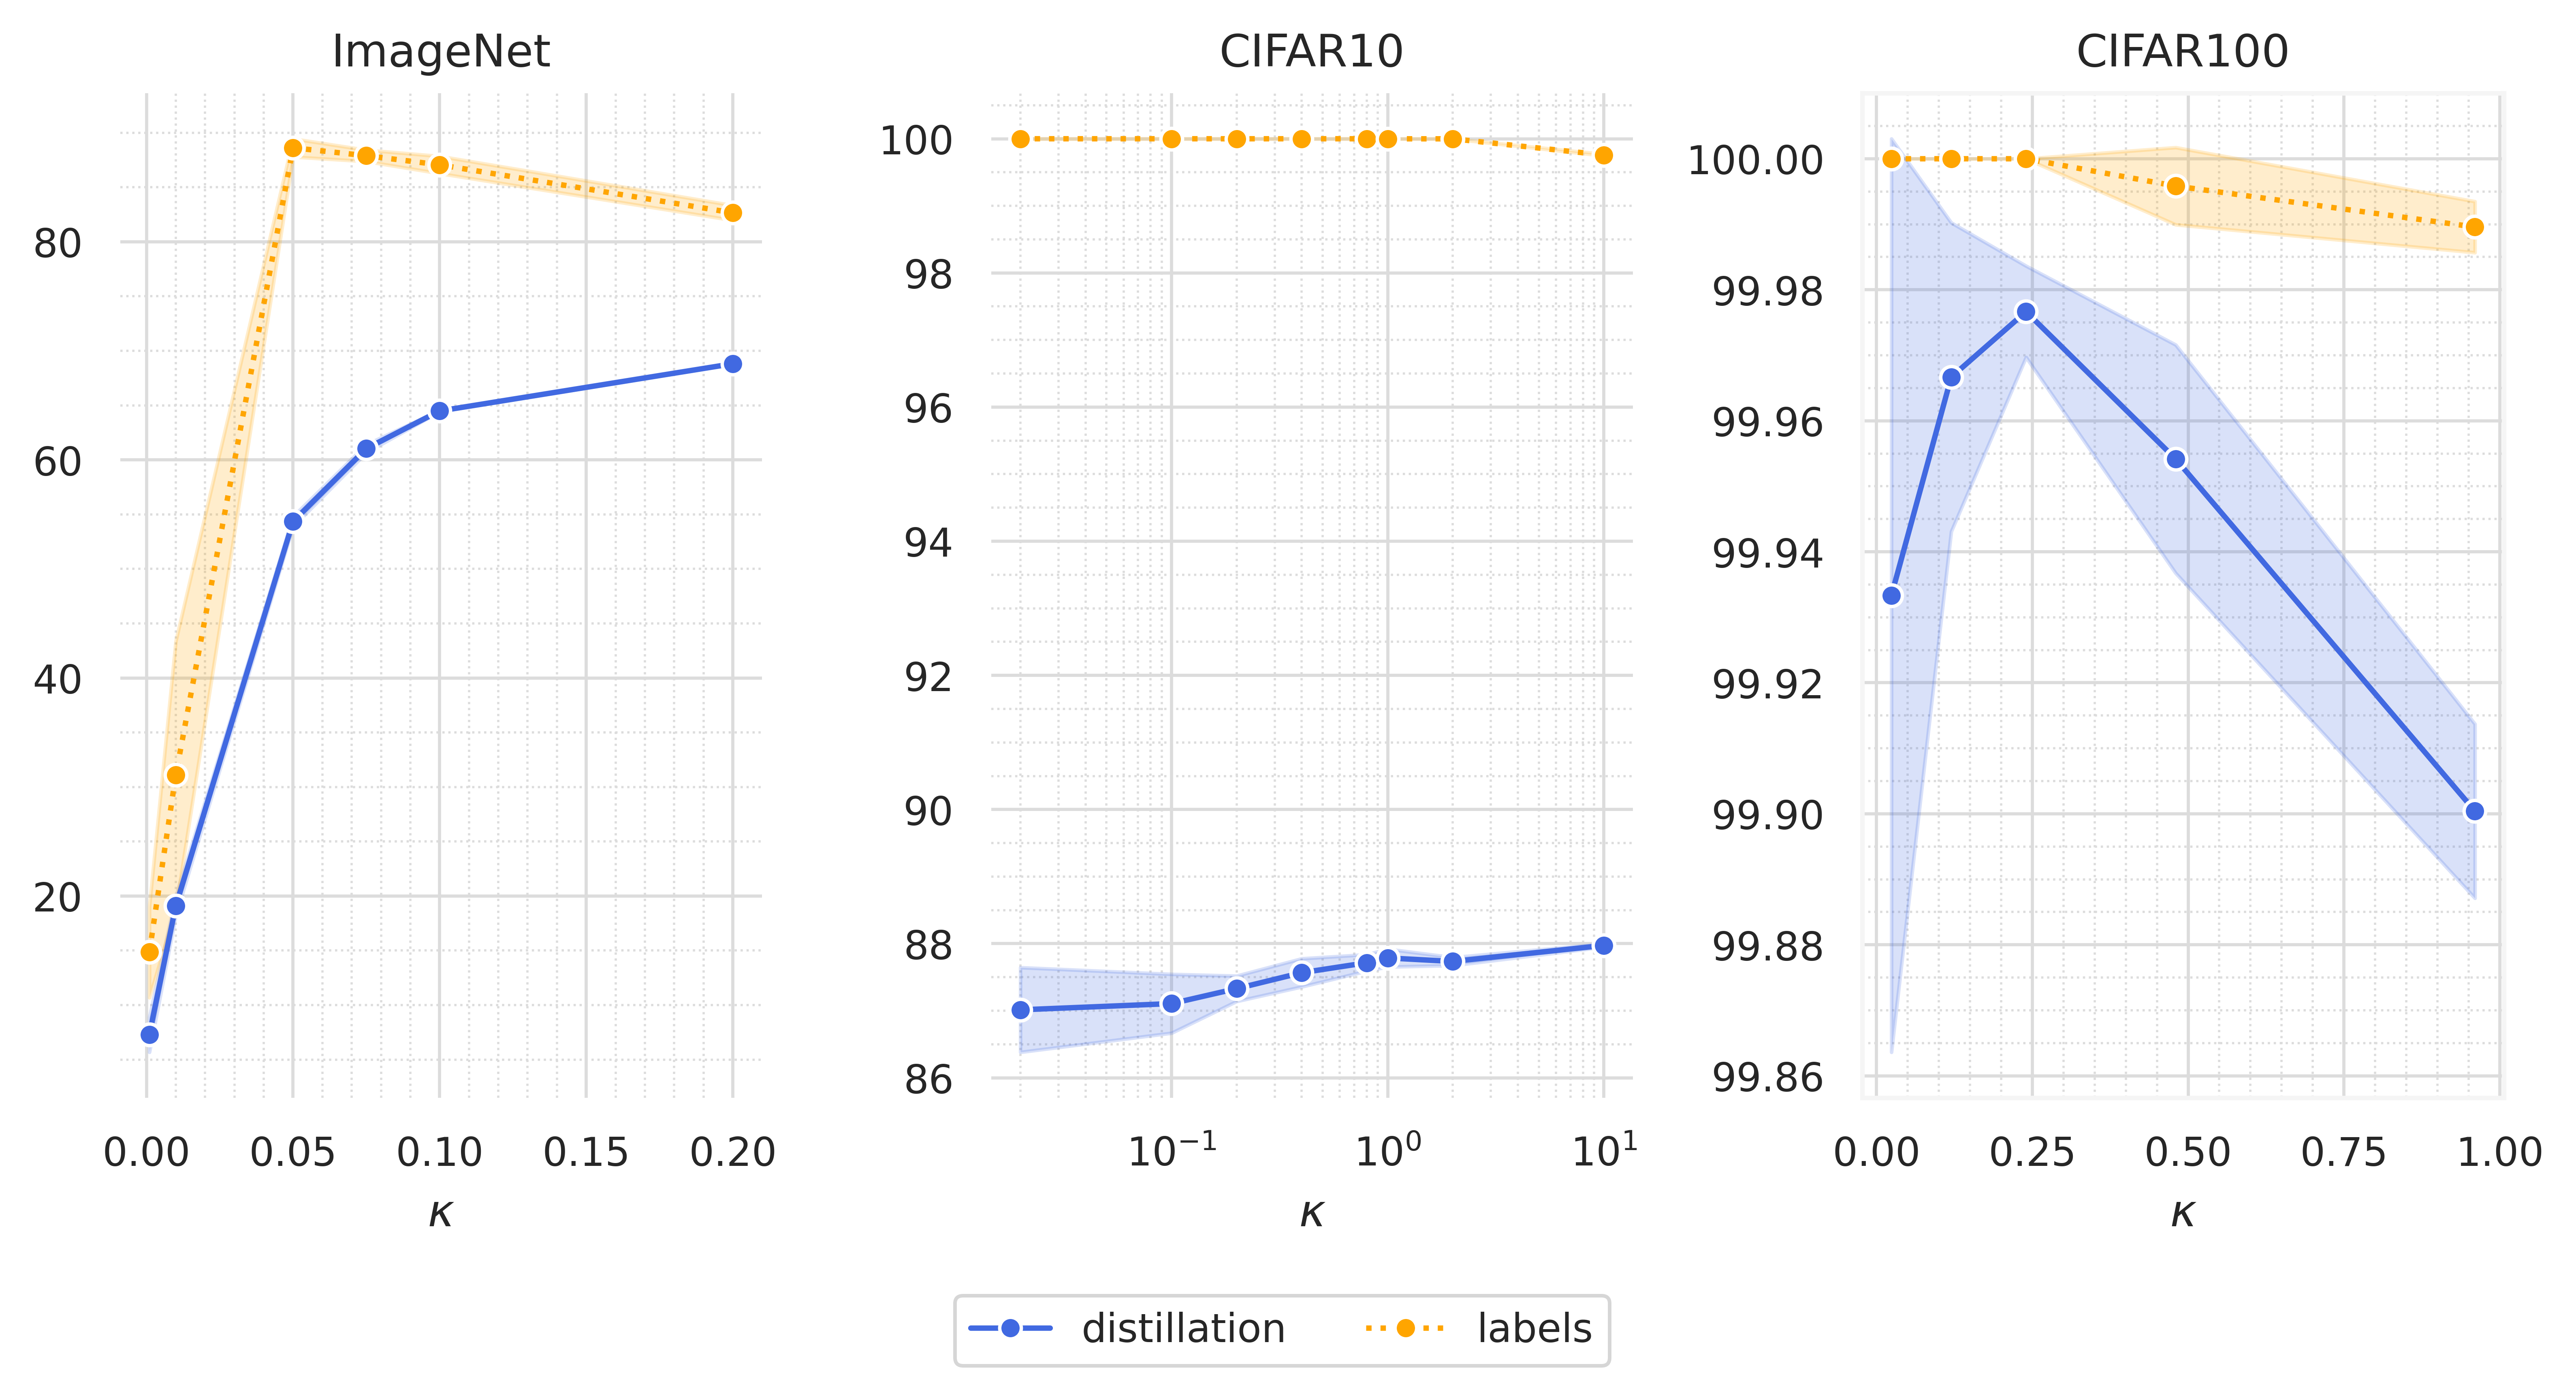

In [109]:
%matplotlib inline
sns.set_context("paper")
with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(1,3, figsize=(8,4), sharey=False, dpi=800)
    colors = ['orange','royalblue']
    

    # --------------------------------------------------------------------------
    _df = res_df_imagenet.loc[res_df_imagenet['final_cka_train']>0]
    _df = process_dataframe(_df, N=1200000)
    _df0 = _df.loc[_df['temperature']==20]
    _df1 = _df.loc[_df['alpha']==1]
    sns.lineplot(data=_df0, x="buffer_size_p", y="final_train_acc_S", errorbar="sd",
                 markers=True, marker='o', color=colors[1], ls='-',ax=ax[0])
    sns.lineplot(data=_df1, x="buffer_size_p", y="final_train_acc_S", errorbar="sd",
                markers=True, marker='o', color=colors[0], ls=':', ax=ax[0])
    
    #ax[0].set_xscale('log')
    ax[0].set_title(f"ImageNet", fontsize=10, y=1.)
    ax[0].set_ylabel(r'', fontsize=11, x=-0.2)
    ax[0].set_xlabel(r'$\kappa$', fontsize=10, y=+1)
    # AESTHETICS control 
    ax[0].set_facecolor('white')
    [ax[0].spines[side].set_visible(False) for side in ax[0].spines]
    [ax[0].spines[side].set_color('whitesmoke') for side in ax[0].spines]
    # major and minor grids
    ax[0].grid(which='major', color='gainsboro', linewidth=0.7)
    ax[0].grid(which='minor', color='gainsboro', linestyle=':', linewidth=0.5)
    # Make the minor ticks and gridlines show.
    ax[0].minorticks_on()



    # --------------------------------------------------------------------------

    _df = res_df_c10.loc[res_df_c10['teacher_network']=='resnet18']
    _df = process_dataframe(_df, N=60000)
    _df0 = _df.loc[_df['temperature']==20]
    _df1 = _df.loc[_df['alpha']==1]
    sns.lineplot(data=_df0, x="buffer_size_p", y="final_train_acc_S", errorbar="sd",
                 markers=True, marker='o', color=colors[1], ls='-',ax=ax[1])
    sns.lineplot(data=_df1, x="buffer_size_p", y="final_train_acc_S", errorbar="sd",
                markers=True, marker='o', color=colors[0], ls=':', ax=ax[1])

    #ax[1].set_xscale('symlog',linthresh=10e-3)
    ax[1].set_xscale('log')
    ax[1].set_title(f"CIFAR10", fontsize=10, y=1.)
    ax[1].set_ylabel(r'', fontsize=11, x=-0.2)
    ax[1].set_xlabel(r'$\kappa$', fontsize=10, y=+1)
    # AESTHETICS control 
    ax[1].set_facecolor('white')
    [ax[1].spines[side].set_visible(False) for side in ax[0].spines]
    [ax[1].spines[side].set_color('whitesmoke') for side in ax[1].spines]
    # major and minor grids
    ax[1].grid(which='major', color='gainsboro', linewidth=0.7)
    ax[1].grid(which='minor', color='gainsboro', linestyle=':', linewidth=0.5)
    # Make the minor ticks and gridlines show.
    ax[1].minorticks_on()



    # --------------------------------------------------------------------------

    _df = res_df_c100.loc[res_df_c100['notes']=="cifar100-resnet18-distillation-v2"]
    _df = process_dataframe(_df, N=50000)
    _df0 = _df.loc[_df['temperature']==20]
    _df1 = _df.loc[_df['alpha']==1]
    sns.lineplot(data=_df0, x="buffer_size_p", y="final_train_acc_S", errorbar="sd",
                 markers=True, marker='o', color=colors[1], ls='-',ax=ax[2], label="distillation")
    sns.lineplot(data=_df1, x="buffer_size_p", y="final_train_acc_S", errorbar="sd",
                markers=True, marker='o', color=colors[0], ls=':', ax=ax[2], label="labels")

    #ax[2].set_xscale('log')
    ax[2].set_title(f"CIFAR100", fontsize=10, y=1.)
    ax[2].set_ylabel(r'', fontsize=11, x=-0.2)
    ax[2].set_xlabel(r'$\kappa$', fontsize=10, y=+1)
    # AESTHETICS control 
    ax[2].set_facecolor('white')
    #[ax[2].spines[side].set_visible(False) for side in ax[0].spines]
    [ax[2].spines[side].set_color('whitesmoke') for side in ax[2].spines]
    # major and minor grids
    ax[2].grid(which='major', color='gainsboro', linewidth=0.7)
    ax[2].grid(which='minor', color='gainsboro', linestyle=':', linewidth=0.5)
    # Make the minor ticks and gridlines show.
    ax[2].minorticks_on()

    # --------------------------------------------------------------------------
    h, _ = ax[2].get_legend_handles_labels()
    ax[2].get_legend().remove()


    fig.legend(h, ['distillation','labels'], ncols=2, 
               loc="lower center", bbox_to_anchor=(0.5, -0.08)) 

    
    #sns.despine()
    plt.tight_layout()

/tmp/ipykernel_1766551/3482072775.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['buffer_size_p'] = df['buffer_size']/N
/tmp/ipykernel_1766551/3482072775.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['generalization_gap'] = df['final_val_acc_S']-df['final_train_acc_S']
/tmp/ipykernel_1766551/3482072775.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

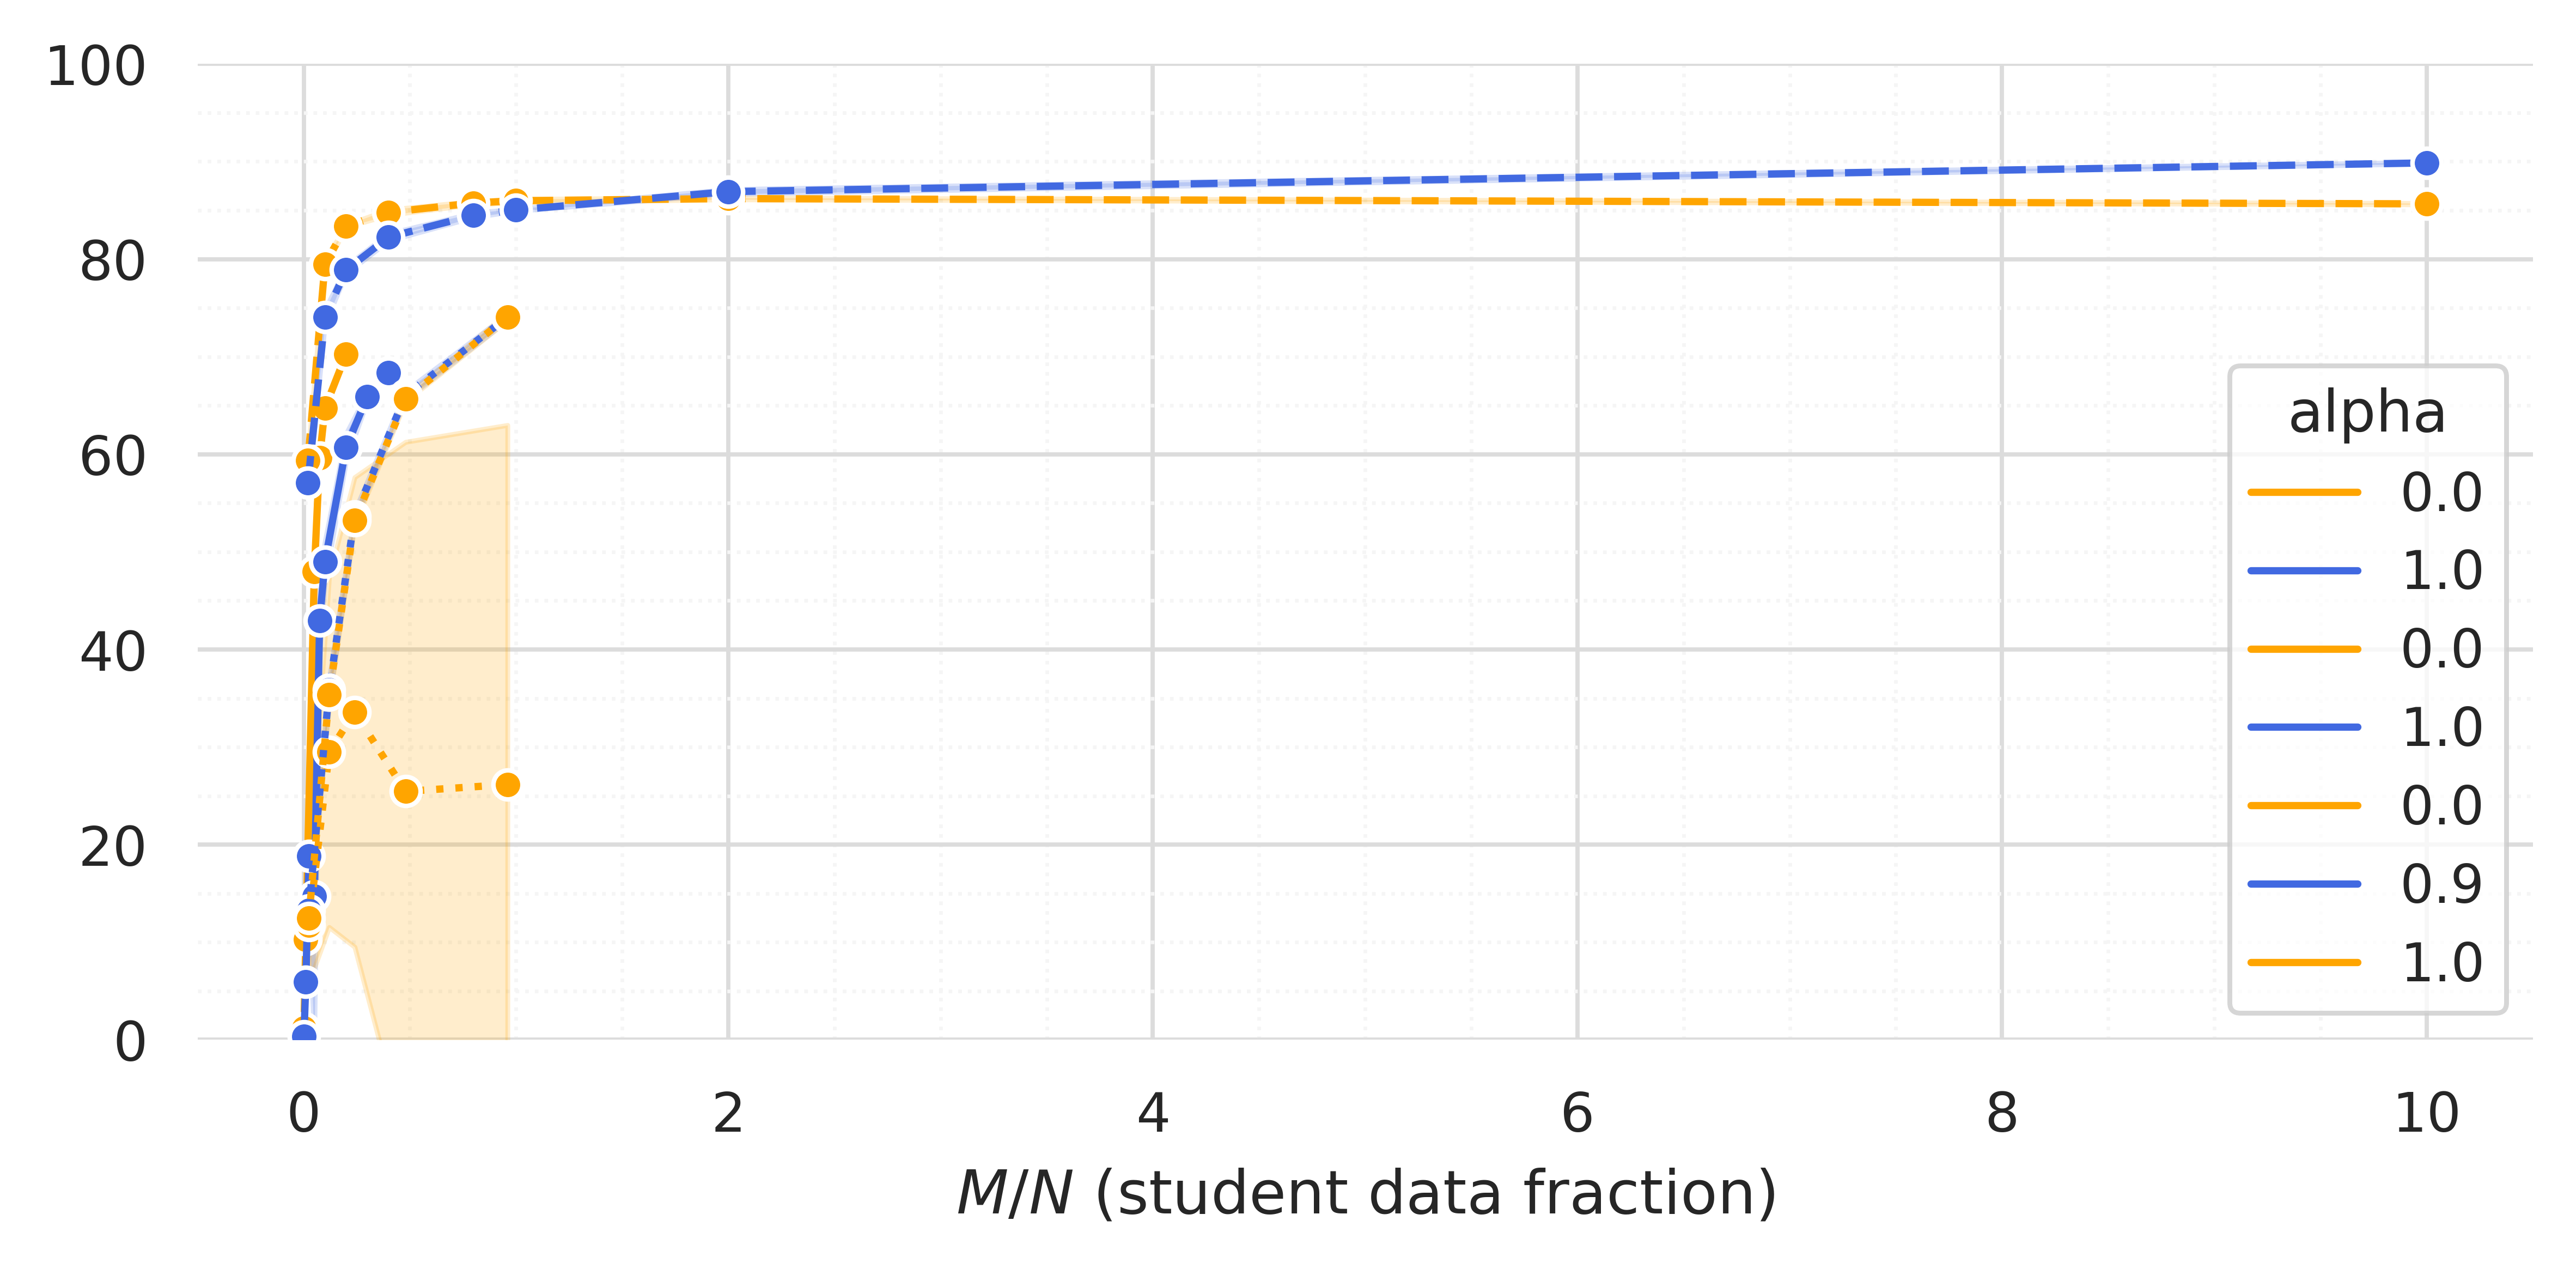

In [17]:
%matplotlib inline
sns.set_context("paper")
with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(1,3, figsize=(8,4), sharey=False, dpi=800)
    colors = ['orange','royalblue']
    

    # --------------------------------------------------------------------------
    _df = res_df_imagenet.loc[res_df_imagenet['final_cka_train']>0]
    _df = process_dataframe(_df, N=1200000)
    _df0 = _df.loc[_df['temperature']==20]
    _df1 = _df.loc[_df['alpha']==1]
    sns.lineplot(data=_df0, x="buffer_size_p", y="final_val_acc_S", errorbar="sd",
                 markers=True, marker='o', color=colors[1], ls='-',ax=ax[0])
    sns.lineplot(data=_df1, x="buffer_size_p", y="final_val_acc_S", errorbar="sd",
                markers=True, marker='o', color=colors[0], ls=':', ax=ax[0])
    
    #ax[0].set_xscale('log')
    ax[0].set_title(f"ImageNet", fontsize=10, y=1.)
    ax[0].set_ylabel(r'', fontsize=11, x=-0.2)
    ax[0].set_xlabel(r'$\kappa$', fontsize=10, y=+1)
    # AESTHETICS control 
    ax[0].set_facecolor('white')
    [ax[0].spines[side].set_visible(False) for side in ax[0].spines]
    [ax[0].spines[side].set_color('whitesmoke') for side in ax[0].spines]
    # major and minor grids
    ax[0].grid(which='major', color='gainsboro', linewidth=0.7)
    ax[0].grid(which='minor', color='gainsboro', linestyle=':', linewidth=0.5)
    # Make the minor ticks and gridlines show.
    ax[0].minorticks_on()

    teacher_val_accuracy = list(_df['final_val_acc_D'])[0]
    ax[0].axhline(y=teacher_val_accuracy, color="limegreen", ls=":", linewidth=1.5)



    # --------------------------------------------------------------------------

    _df = res_df_c10.loc[res_df_c10['teacher_network']=='resnet18']
    _df = process_dataframe(_df, N=60000)
    _df0 = _df.loc[_df['temperature']==20]
    _df1 = _df.loc[_df['alpha']==1]
    sns.lineplot(data=_df0, x="buffer_size_p", y="final_val_acc_S", errorbar="sd",
                 markers=True, marker='o', color=colors[1], ls='-',ax=ax[1])
    sns.lineplot(data=_df1, x="buffer_size_p", y="final_val_acc_S", errorbar="sd",
                markers=True, marker='o', color=colors[0], ls=':', ax=ax[1])

    #ax[1].set_xscale('symlog',linthresh=10e-3)
    ax[1].set_xscale('log')
    ax[1].set_title(f"CIFAR10", fontsize=10, y=1.)
    ax[1].set_ylabel(r'', fontsize=11, x=-0.2)
    ax[1].set_xlabel(r'$\kappa$', fontsize=10, y=+1)
    # AESTHETICS control 
    ax[1].set_facecolor('white')
    [ax[1].spines[side].set_visible(False) for side in ax[0].spines]
    [ax[1].spines[side].set_color('whitesmoke') for side in ax[1].spines]
    # major and minor grids
    ax[1].grid(which='major', color='gainsboro', linewidth=0.7)
    ax[1].grid(which='minor', color='gainsboro', linestyle=':', linewidth=0.5)
    # Make the minor ticks and gridlines show.
    ax[1].minorticks_on()


    teacher_val_accuracy = list(_df['final_val_acc_D'])[0]
    ax[1].axhline(y=teacher_val_accuracy, color="limegreen", ls=":", linewidth=1.5)


    # --------------------------------------------------------------------------

    _df = res_df_c100.loc[res_df_c100['notes']=="cifar100-resnet18-distillation-v2"]
    _df = process_dataframe(_df, N=50000)
    _df0 = _df.loc[_df['temperature']==20]
    _df1 = _df.loc[_df['alpha']==1]
    sns.lineplot(data=_df0, x="buffer_size_p", y="final_val_acc_S", errorbar="sd",
                 markers=True, marker='o', color=colors[1], ls='-',ax=ax[2], label="distillation")
    sns.lineplot(data=_df1, x="buffer_size_p", y="final_val_acc_S", errorbar="sd",
                markers=True, marker='o', color=colors[0], ls=':', ax=ax[2], label="labels")

    #ax[2].set_xscale('log')
    ax[2].set_title(f"CIFAR100", fontsize=10, y=1.)
    ax[2].set_ylabel(r'', fontsize=11, x=-0.2)
    ax[2].set_xlabel(r'$\kappa$', fontsize=10, y=+1)
    # AESTHETICS control 
    ax[2].set_facecolor('white')
    #[ax[2].spines[side].set_visible(False) for side in ax[0].spines]
    [ax[2].spines[side].set_color('whitesmoke') for side in ax[2].spines]
    # major and minor grids
    ax[2].grid(which='major', color='gainsboro', linewidth=0.7)
    ax[2].grid(which='minor', color='gainsboro', linestyle=':', linewidth=0.5)
    # Make the minor ticks and gridlines show.
    ax[2].minorticks_on()

    teacher_val_accuracy = list(_df['final_val_acc_D'])[0]
    ax[2].axhline(y=teacher_val_accuracy, color="limegreen", ls=":", linewidth=1.5)

    # --------------------------------------------------------------------------
    h, _ = ax[2].get_legend_handles_labels()
    ax[2].get_legend().remove()


    fig.legend(h, ['distillation','labels'], ncols=2, 
               loc="lower center", bbox_to_anchor=(0.5, -0.08)) 

    
    #sns.despine()
    plt.tight_layout()

/tmp/ipykernel_741652/994060833.py:13: UserWarning: The palette list has more values (10) than needed (7), which may not be intended.
  sns.lineplot(data=_df0, x="buffer_size_p", y="final_val_acc_S", label="", style="alpha",


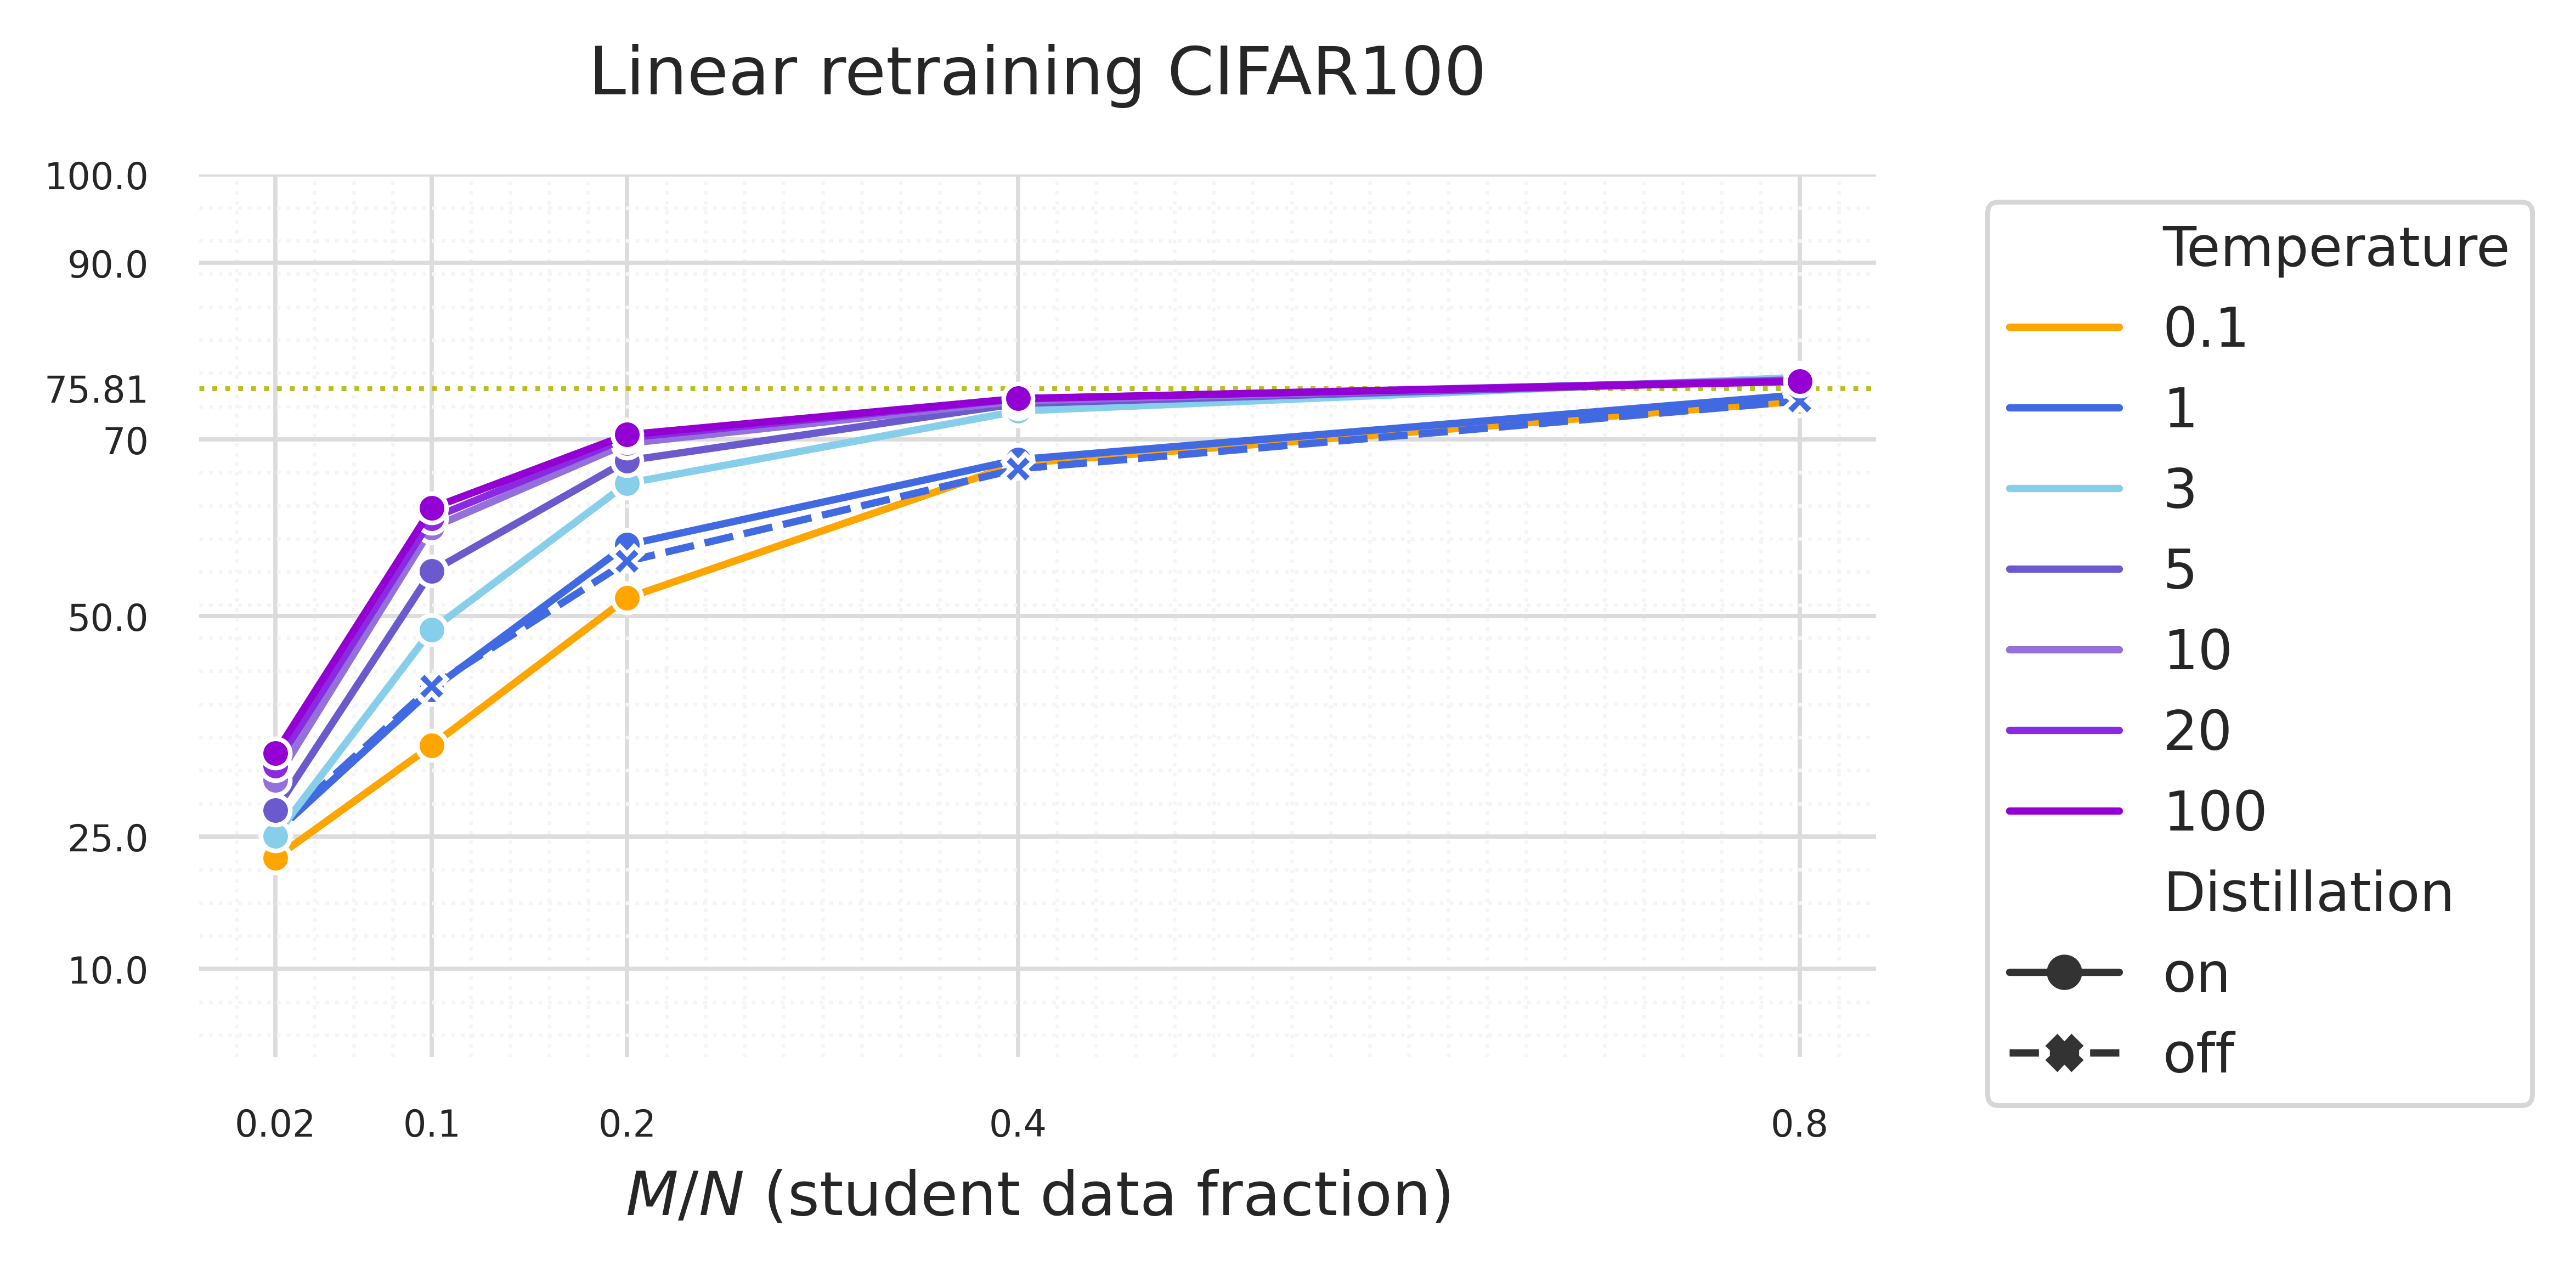

In [43]:
%matplotlib inline
sns.set_context("paper")
with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(figsize=(6,3), sharey=True, dpi=800)
    colors = ['royalblue','orange','purple', 'mediumorchid','mediumpurple', 'slateblue']
    colors = ['orange','royalblue','skyblue','slateblue','mediumpurple','blueviolet','darkviolet', 'purple','mediumvioletred','indigo']

    cmap = plt.get_cmap('twilight', len(temperatures)+4)
    color_list = [mpl.colors.rgb2hex(cmap(i)[:3]) for i in range(cmap.N)][3:]


    _df0 = working_df
    sns.lineplot(data=_df0, x="buffer_size_p", y="final_val_acc_S", label="", style="alpha",
                markers=True, hue="T",ax=ax, palette=colors, err_style='band')


    # ax.tick_params(axis='both',  labelsize=6)
    # xticks  = [1.0,  1.2,  1.4,  1.6,  1.8, 2.0]
    # ax.set_xticks(xticks)
    # ax.set_xticklabels(xticks, fontsize=6)
    # ax.tick_params(axis='x',  rotation=0)

    ax.set_ylabel(r'Student-Teacher kernel alignment', fontsize=8, x=-0.2)
    ax.set_xlabel(r'Gain factor', fontsize=8, y=10)


    #ax[t].legend(title="Eigen-index", loc="upper left")
    # Shrink current axis's height by 10% on the bottom
    
    h, _ = ax.get_legend_handles_labels()
    ax.legend(h, ["Data", 1200, 6000, 12000, 24000, 48000, "Temperature", 1, 3, 5, 10, 20, 100, "Distillation", "on", "off"], 
                title="", ncol=1, 
                bbox_to_anchor=(1.05, 1.0), fontsize=5)
    
    ax.set_ylim([0.0,100.0])

    ax.tick_params(axis='both',  labelsize=9)
    ax.set_xticks(buffer_sizes_p)
    #ax.set_xticklabels(['']+[ f'{l}' for l in buffer_sizes_p[0:]], fontsize=6)
    ax.set_xticklabels(buffer_sizes_p, fontsize=6)
    ax.tick_params(axis='x',  rotation=0)

    yticks = [10.0, 25., 50., 70, teacher_val_accuracy, 90., 100.0]
    plt.yticks(yticks)
    ax.set_yticklabels(yticks, fontsize=6)

    #ax.axvline(x=1.0, color='mediumslateblue', linewidth=1.0, linestyle=':')

    # #ax.text(10.0,0, "Local", color="white", bbox={'facecolor': 'tab:green', 'alpha': 0.5, 'pad': 10})
    # ax.set_ylim(-1,10000.0)


    ax.set_title(f"Linear retraining CIFAR100", fontsize=11, y=1.05)
    ax.set_ylabel(r'', fontsize=11, x=-0.2)
    ax.set_xlabel(r'$M/N$ (student data fraction)', fontsize=10, y=+1)


    #ax[t].legend(title="Eigen-index", loc="upper left")
    # Shrink current axis's height by 10% on the bottom
    
    h, _ = ax.get_legend_handles_labels()
    ax.legend(h, ["Temperature", 0.1, 1, 3, 5, 10, 20, 100, "Distillation", "on", "off"], 
                title="", ncol=1, 
                bbox_to_anchor=(1.05, 1.0), fontsize=9)


    # AESTHETICS control 
    ax.set_facecolor('white')
    [ax.spines[side].set_visible(False) for side in ax.spines]
    # major and minor grids
    ax.grid(which='major', color='gainsboro', linewidth=0.7)
    ax.grid(which='minor', color='whitesmoke', linestyle=':', linewidth=0.6)
    # Make the minor ticks and gridlines show.
    ax.minorticks_on()
    #ax.tick_params(which='minor', bottom=False, left=False)
    #fig.supxlabel(r' % of dataset used', fontsize=12, y=-0.1)

    a = ax.get_ygridlines()
    b = a[4]
    b.set_color('tab:olive')
    b.set_linewidth(0.8)
    b.set_linestyle(':')
    #sns.despine()
    plt.tight_layout()